<a href="https://colab.research.google.com/github/cullena20/inspiritai/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Instructor Led Discussion

### Introduction to Breast Cancer Biopsy Classification

In this project, imagine that your colleague, an oncologist (cancer doctor), is working in a major hospital that specializes in treating breast cancers. Breast cancer tumors are very complicated at the cellular level, and this makes determining whether a patient's tumor is malignant (dangerous) or benign (not dangerous) a challenge. Your task will be to build a classifier that can determine whether a sample is malignant or benign to help your colleague!

Every patient that arrives at the hospital undergoes a biopsy of their tumor. This means that a small sample of the tumor is taken from the patient and various metrics are recorded about it, including: radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, and fractal dimension. 

Using a large dataset of labeled biospy samples from breast cancer tumors, you will build your binary classification model to determine whether a tumor is malignant or benign based on these features. Then, this model can help you to better determine diagnoses for new patients who arrive at the hospital.


## Today...
We will explore together the steps that you could take to help your friend solve this problem!

#### 1. Background and data exploration

- Exercise 1 (exploring the data)

#### 2. Simple boundary classifier

- Exercise 2 (separating on a boundary)
- Exercise 3 (precision, recall, accuracy)

#### 3. Modifying with logistic regression

- Exercise 4 (single feature logistic regression)
- Exercise 5 (multiple feature logistic regression)

#### 4. Decision trees walkthrough



# Background and data exploration

## Diagnosing cancer with biopsies


Before we dive into building a classifier for breast cancer tumors, it's important to understand how the data are generated and gain intuition for what the various features mean.

![alt text](https://www.rxdatascience.com/hubfs/Raj%20Files/es1.jpg)

The above image is an example of cancerous (malignant) breast cells next to benign cells. These cells were removed as part of a biopsy of a tumor from a patient in which a small amount of fluid/tissue from the tumor is sampled with a special needle. Then, the cells in this sample are strained with different dyes to visualize their shapes, how much DNA they have, etc. All these properties can help to give hints as to whether cells are rapidly dividing cancer cells or not. 

Our dataset reports 10 different features of the biopsies. Here's what each means:

1. $Radius$: Average distance from the center of the cell's nucleus to its perimeter.
2. $Perimeter$: Total distance between points defining the cell's nuclear perimeter.
3. $Area$: Nuclear area is measured by counting the number of pixels on the interior of the nucleus and adding one-half of the pixels in the perimeter.

The following image should give a visual to what these cell nucleus features look like: 

![perimeter](https://drive.google.com/uc?export=view&id=1-U43OAojYbMY9gIlpvLHPNr3V2saqqHJ)

4. $Compactness$: Calculated as the compactness of the cell nuclei using the
formula $perimeter^2/area$
5. $Smoothness$: Measures the smoothness of a nuclear contour by measuring the difference between the length of a radial line and the mean length of the lines surrounding it. The image below demonstrates this:

![alt text](https://drive.google.com/uc?export=view&id=10GokzG7KDKxClJwHPIuIcr3ivvWGRetY)


The paper that first detailed these measurements for this dataset can be found here for more information: https://pdfs.semanticscholar.org/1c4a/4db612212a9d3806a848854d20da9ddd0504.pdf 


## Breast cancer diagnostic dataset

The dataset we will use to train our model is called the Breast Cancer Wisconsin (Diagnostic) Data Set. It consists of 569 biopsy samples, just like the ones described above, from breast cancer tumors. 

Each biopsy sample in the dataset is labeled with an ID number and whether or not the tumor it came from is malignant (M) or benign (B). Each sample also has 10 different features associated with it, some of which are described above. Remember that each feature value for a given biopsy sample is a real-valued number.

Think: what sorts of features would you expect to be different between a rapidly growing, malignant cancer cell and a healthy one? Why?

In [ ]:
# Load the data!
import gdown 
import pandas as pd
from sklearn import metrics
gdown.download('https://drive.google.com/uc?id=1grV8hSxULsGvnbwEMPjPaknccfIOlcoB','cancer_data.csv', quiet=False);
data = pd.read_csv('cancer_data.csv')
data['diagnosis'].replace({'M':1, 'B':0}, inplace = True)
data.to_csv('cancer_data.csv')
del data

Downloading...
From: https://drive.google.com/uc?id=1grV8hSxULsGvnbwEMPjPaknccfIOlcoB
To: /content/cancer_data.csv
100%|██████████| 125k/125k [00:00<00:00, 19.3MB/s]


## Loading our annotated dataset

The first step in building our breast cancer tumor classification model is to load in the dataset we'll use to "teach" (or "train") our model.

In [ ]:
# First, import helpful Python tools for loading/navigating data
import os             # Good for navigating your computer's files 
import numpy as np    # Great for lists (arrays) of numbers
import pandas as pd   # Great for tables (google spreadsheets, microsoft excel, csv)

In [ ]:
data_path  = 'cancer_data.csv'

In [ ]:
# Use the 'pd.read_csv('file')' function to read in read our data and store it in a variable called 'dataframe'
dataframe = pd.read_csv(data_path)

 ## Looking at our dataset
 
 #### Exercise 1
 
 A key step in machine learning (and coding in general!) is to view the structure and dimensions of our new dataframe, which stores all our training data from the tumor biopsies. We want to confirm that the size of our table is correct, check out the features present, and get a more visual sense of what it looks like overall.

In [ ]:
# Let's look at just a few of the biopsy sample features to start by subsetting our 'dataframe'
# dataframe.head() if you run this first, it shows all the data. There are a lot of features.
dataframe = dataframe[['diagnosis','radius_mean','area_mean', 'radius_se', 'area_se', 'smoothness_mean','smoothness_se']]

You can think of dataframes like Google or Microsoft Excel spreadsheets (large tables with row/column headers) 

**Use the 'head()' method to show the first five rows of the table and their corresponding column headers (our 7 biopsy features!)**

In [ ]:
# YOUR CODE HERE: 
dataframe.head()
# END CODE

,diagnosis,radius_mean,area_mean,radius_se,area_se,smoothness_mean,smoothness_se
0,1,17.99,1001.0,1.0950,153.40,0.11840,0.006399
1,1,20.57,1326.0,0.5435,74.08,0.08474,0.005225
2,1,19.69,1203.0,0.7456,94.03,0.10960,0.006150
3,1,11.42,386.1,0.4956,27.23,0.14250,0.009110
4,1,20.29,1297.0,0.7572,94.44,0.10030,0.011490


Our colleague has given us documentation on what each feature column means. Specifically:

* $diagnosis$: Whether or not the tumor was diagnosed as malignant (M) or benign (B).
* $radius$_$mean$: The radius data feature, averaged across cells in that particular biopsy
* $area$_$mean$: The area data feature, averaged across cells in that particular biopsy
* $radius$_$se$: The standard error of the radius data feature for cells in that particular biopsy
* $area$_$se$: The standard error of the area data feature for cells in that particular biopsy
* $smoothness$_$mean$: The smoothness feature, averaged across cells in that particular biopsy
* $smoothness$_$se$: The standard error of the smoothness data feature for cells in that particular biopsy

Recall that the term mean refers to taking an average (summing the values for each cell and dividing by the total number of cells observed in that biopsy). Additionally, standarded error gives a sense of the standard deviation (how much variance there is between cells in that biopsy for that feature). 

In [ ]:
# Next, we'll use the 'info' method to see the data types of each column
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   diagnosis        569 non-null    int64  
 1   radius_mean      569 non-null    float64
 2   area_mean        569 non-null    float64
 3   radius_se        569 non-null    float64
 4   area_se          569 non-null    float64
 5   smoothness_mean  569 non-null    float64
 6   smoothness_se    569 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 31.2 KB


**Question: We see that these are all numeric data types. Does this make sense? Why?**


# Simple boundary classifier

Great! You've gotten a sense of the dataset we will use to train our classification model. Our approach will be to first start simple -- let's look at just one feature of the data samples and see how well its value predicts M vs. B for our labeled dataset. 

## Can mean radius predict diagnosis?

In [ ]:
# First, we'll import some handy data visualization tools
import seaborn as sns
import matplotlib.pyplot as plt 

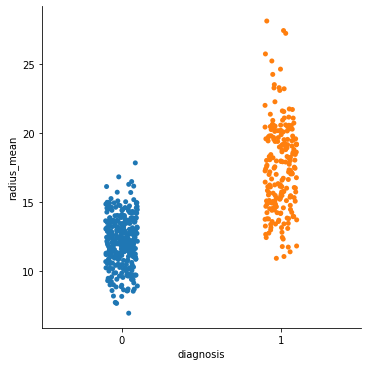

In [ ]:
# To see how well mean radius correlates with diagnosis, we'll plot the data
# separated based on diagnosis category on the x-axis and have the points' y-value
# be its mean radius value

sns.catplot(x = 'diagnosis', y = 'radius_mean', data = dataframe)
plt.show()

**Question:** How would you interpret what is going on in the chart above?


Malignant cells tend to have larger radiuses.

## Classification is just drawing boundaries!
Next, we might want to check just how well mean radius can be used to classify, or separate, the datapoints in either category
Let's pick a boundary value for the radius mean and see how well it separates the data

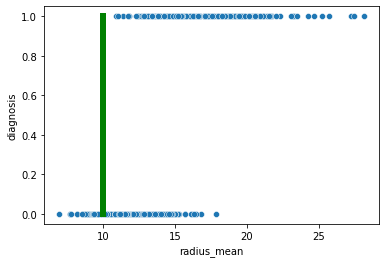

In [ ]:
boundary = 10
sns.scatterplot(x = 'radius_mean', y = 'diagnosis', data = dataframe)
plt.plot([boundary, boundary], [0, 1], 'g', linewidth = 6)
plt.show()

**Question:** Does this boundary value separate the data well?


Using a boundary value, we can build a boundary classifier function. This function will take in a boundary value of our choosing and then classify the data points based on whether or not they are above or below the boundary.

#### Building the boundary classifier
#### Exercise (optional)
Here we build the function that takes in a target boundary (value of radius mean). Write a function to implement a boundary classifier. Think about what the return 'type' of this classifier might be. The parameter target_boundary refers to the boundary value, and x is a pandas Series data type object (a labeled 1D array).


```
def boundary_classifier(target_boundary,x):
          return ____
```




In [ ]:
# YOUR CODE HERE: 
def boundary_classifier(target_boundary, x):
  return (x > target_boundary).replace({True: 1, False: 0})

In [ ]:
print(boundary_classifier(5, pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])))

0    0
1    0
2    0
3    0
4    0
5    1
6    1
7    1
8    1
9    1
dtype: int64


The code below chooses a boundary and runs it for us. 

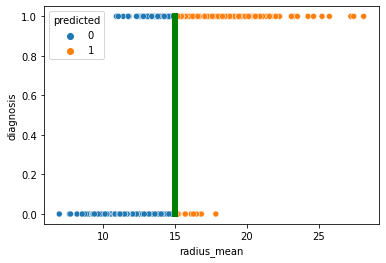

In [ ]:
chosen_boundary = 15
y_pred = boundary_classifier(chosen_boundary, dataframe['radius_mean'])
dataframe['predicted'] = y_pred
y_true = dataframe['diagnosis']

sns.scatterplot(x = 'radius_mean', y = 'diagnosis', hue = 'predicted', data = dataframe)
plt.plot([chosen_boundary, chosen_boundary], [0, 1], 'g', linewidth = 6)
plt.show()

In [ ]:
accuracy = metrics.accuracy_score(y_true,y_pred)
print(accuracy)
# print(metrics.accuracy_score(y_true, y_pred), metrics.precision_score(y_true, y_pred), metrics.recall_score(y_true, y_pred))

0.8892794376098418


**Now adjust the chosen boundary above to get the best possible 'separation'. As you do that, think about what it means for a separation to be 'good'. Try playing around with the boundary value to get the highest possible accuracy.**

## What makes a separation good?


### Instructor Led Discussion:



From exploring different boundary values for the radius mean feature, you can see that depending on which value is chosen, the data points are classified slighly differently. This brings up the question of how we can evaluate how good a classification is. 

Often, we do this by looking at the rates of true positives/true negatives/false positives/false negatives. Let's define these important terms:

**True positive rate (TPR)**: Sometimes called sensitvity, the TPR is the proportion of actual positives that are correctly identified as such. An analogy would be the percentage of sick people who are correctly identified as having the disease in some population.

**True negative rate (TNR)**: Sometimes called specificity, the TNR is the proportion of actual negatives that are correctly identified as such. An analogy would be the the percentage of healthy people who are correctly identified as not having the disease in some population.

**False positive rate (FPR)**: The FPR is the proportion of actual negatives that are incorrectly identified as positives. An analogy would be the percentage of healthy people who are incorrectly identified as having the disease.

**False negative rate (FNR)**: The FPR is the proportion of actual positives that are incorrectly identified as negatives. An analogy would be the percentage of sick people who are incorrectly identified as healthy.

A key insight is that there is a tradeoff when trying to reduce the different types of errors. For instance, if we want to increase our TPR (thus decrease our FNR by correctly identifying more sick people), our improvements will have to increase the number of people we guess to be sick. However, such an improvement will decrease our TNR (thus inrease our FPR by guessing more healty people are sick). 

Sometimes, one type of error is worse than the others for a given problem. Other times, however, we must strike an acceptable balance between the two.

![alt text](https://drive.google.com/uc?export=view&id=1S4S2MBM86D74C-Q0aPPwHzbU8iUveLKq)

### Exercise 3

Next, let's evaluate the performance of our model quantitatively. We can visualize statistics on the number of correct vs. incorrect predictions using a plot called a Confusion Matrix.


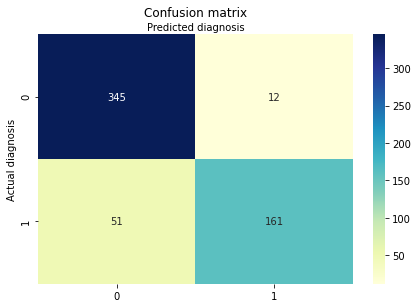

In [ ]:
# Import the metrics class
from sklearn import metrics

# Create the Confusion Matrix
y_test = dataframe['diagnosis']
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

# Visualizing the Confusion Matrix
class_names = [0,1] # Our diagnosis categories

fig, ax = plt.subplots()
# Setting up and visualizing the plot (do not worry about the code below!)
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') # Creating heatmap
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual diagnosis')
plt.xlabel('Predicted diagnosis')
plt.show()

**Question: How would you interpret the confusion matrix above? Are we doing well at the classification?**

Let's calculate how well our model does using sklearn, specifically, we will use the following functions: 
* `accuracy = metrics.accuracy_score(y_test, y_pred)`
* `precision = metrics.precision_score(y_test, y_pred)`
* `recall = metrics.recall_score(y_test, y_pred)`

Make a function called `model_stats' that calculates each of these metrics and prints their values:
        
        `def model_stats(y_test, y_pred):`


In [ ]:
# YOUR CODE HERE:  
def model_stats(y_test, y_pred):
  accuracy = metrics.accuracy_score(y_test, y_pred)
  precision = metrics.precision_score(y_test, y_pred)
  recall = metrics.recall_score(y_test, y_pred)
  return f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}"
# END CODE

In [ ]:
print(model_stats(y_test, y_pred))

Accuracy: 0.8892794376098418, Precision: 0.930635838150289, Recall: 0.7594339622641509


**Question: What does each of these values represent? What is the difference between each statistic?**

# Finding a better separation with logistic regression



#### Exercise 4

Now, it's time to move away from our simple guess-and-check model and work towards implementing a an approach that can automatically find a better separation. One of the most common methods for this is called 'Logistic Regression'. 

First, we'll start by just using the radius_mean feature. 

In [ ]:
# Let's pull our handy linear fitter from our 'prediction' toolbox: sklearn!
from sklearn import linear_model

### Training Data vs Test Data

We're splitting up our data set into groups called 'train' and 'test'. We teach our 'model' the patterns using the train data, but the whole point of machine learning is that our prediction should work on 'unseen' data or 'test' data. The function below does this for you. 


In [ ]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(dataframe, test_size = 0.4, random_state = 1)


Let's now take a look at the 'train' and 'test' groups:


In [ ]:
print('\n\nTraining dataframe has %d rows'%train_df.shape[0])
train_df.head()



Training dataframe has 341 rows


,diagnosis,radius_mean,area_mean,radius_se,area_se,smoothness_mean,smoothness_se,predicted
164,1,23.270,1686.0,0.6642,97.85,0.08439,0.004910,1
13,1,15.850,782.7,0.4033,36.58,0.08401,0.009769,1
430,1,14.900,685.0,0.2530,24.19,0.09947,0.006965,0
61,0,8.598,221.8,0.3582,18.39,0.12430,0.011930,0
427,0,10.800,359.9,0.3077,20.20,0.08801,0.006543,0


In [ ]:
print('\n\nTesting dataframe has %d rows'%test_df.shape[0])
test_df.head()



Testing dataframe has 228 rows


,diagnosis,radius_mean,area_mean,radius_se,area_se,smoothness_mean,smoothness_se,predicted
421,0,14.69,656.1,0.5462,49.45,0.10310,0.009976,0
47,1,13.17,534.6,0.2871,24.25,0.11580,0.006532,0
292,0,12.95,513.7,0.2094,17.67,0.10050,0.008725,0
186,1,18.31,1041.0,0.2577,28.92,0.08588,0.002866,1
414,1,15.13,719.5,0.4681,45.38,0.08320,0.006831,1


### Single Variable Logistic Regression
To start with let us set our input feature to be radius mean and our output variable to be the diagnosis. 

We will use this to build a logistic regression model to pedict the diagnosis using radius mean. We will explain what a logistic regression is shortly!

In [ ]:
input_labels = ['radius_mean']
output_label = 'diagnosis'


x_train = train_df[input_labels]
print('Our x variables:')
print(x_train.head())
print('\n\n')

y_train = train_df[output_label]
print('Our y variable:')
print(y_train.head())

Our x variables:
     radius_mean
164       23.270
13        15.850
430       14.900
61         8.598
427       10.800



Our y variable:
164    1
13     1
430    1
61     0
427    0
Name: diagnosis, dtype: int64


**Make sure you know how to interpret the data above before moving forward. Be sure to ask if you are not sure :)**

In [ ]:
# Here, we create a 'reg' object that handles the line fitting for us!
class_rm = linear_model.LogisticRegression()

###Next, we want to tell our 'class_rm' object to take in my inputs (x) and my true labels (y) and fit a line that predicts y from x.

#### Exercise: Can you place the arguments `x_train` and `y_train` correctly into this function to do this?
`class_rm.fit(FILL_ME_IN, FILL_ME_IN)`


In [ ]:
### YOUR CODE HERE

class_rm.fit(x_train, y_train)

### END CODE

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### How do we know if our 'model' is actually 'learning' anything? We need to test it on unseen data.

Here we will be designating test inputs to check our model.

In [ ]:
x_test = test_df[input_labels]

This line of code below gives us the true or actual values for the test inputs.


In [ ]:
y_test = test_df[output_label].values.squeeze()
# print(test_df[output_label])
y_test

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1])

###Next, we need to figure out what our line thinks the diagnosis is based on our data points

#### Exercise: Fill in the appropriate input to this function and run the function below.

`y_pred = class_rm.predict(FILL_ME_IN)`

In [ ]:
## YOUR CODE HERE

y_pred = class_rm.predict(x_test)

## END CODE


In [ ]:
print(y_pred)

[1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 1 1 1 0 1 0 0 0 1
 1 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1
 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0
 0 0 0 1 1 0 0 0 1 0 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 0 0
 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 1 0 0 1]


Run the code below to visualize the results

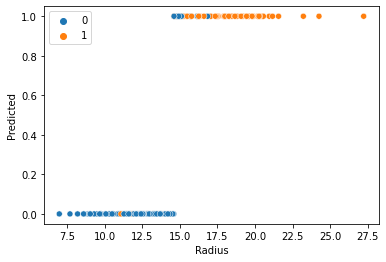

In [ ]:
y_pred = y_pred.squeeze()  # maybe to make it fool proof
x_test_view = x_test[input_labels].values.squeeze()
sns.scatterplot(x = x_test_view, y = y_pred, hue = y_test)
plt.xlabel('Radius')
plt.ylabel('Predicted')
plt.legend()
plt.show()

### Finally, let's re-evalute the recall, accuracy, and precision for the model by calling the functions we created.

In [ ]:
## YOUR CODE HERE

print(model_stats(y_test, y_pred))


Accuracy: 0.8552631578947368, Precision: 0.7831325301204819, Recall: 0.8125


## What is logistic regression doing? It's giving 'soft' predictions!


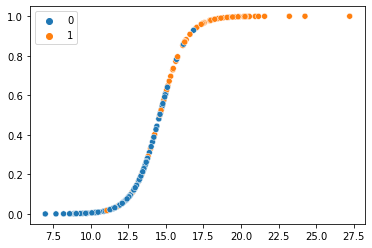

In [ ]:
# Let's visualize the probabilities for `x_test`
y_prob = class_rm.predict_proba(x_test)
sns.scatterplot(x = x_test_view, y = y_prob[:,1], hue = y_test)
plt.show()

The Y-axis is the  probability of being 'malignant' and the X-axis is the radius mean. 

**Can you interpret or take a guess about what the graph above is saying?**

## How does logistic regression relate to linear regression? 



Recall that linear regression establishes a relationship between the independent and dependent variables. This is particularly useful when we want to estimate the dependent variable based on the value of the independent variable(s). 

With logistic regression, we are predicting a probability between 0 and 1 (like whether or not a tumor is malignant or benign). 

When we look at graphical representations, linear regression will yield a line while logistic regression an S-shaped curve. 


## Visualization: linear vs. logistic regression



This plot shows the graphical representations described above. As you can see, the linear model can yield predicted values outside the [0,1] range because it is a continuous linear function. 

On the other hand, the logistic model stays within our bounds. You can see that the logistic model gives a "line" with curvy ends in the [0,1] range, which is the best approximation for a line that will also always respect these boundaries. 

**Confusingly, the biggest difference between linear and logistic regression is that linear regression is used for regression problems (predicting the value of continuous variables) while logistic regression is used for classification problems!**

*Linear Regression:*

![Linear Regression](https://i.stack.imgur.com/kW8YP.png)

*Logistic Regression:*

![Logistic Regression](https://techdifferences.com/wp-content/uploads/2018/01/graph-logistic-regression.jpg)

# (Optional) An even better logistic regression! 

#### Exercise 5

Previously, we still just used a single feature to predict diagnosis. Now, let's leverage our input data's many features to build an even better classifier. First, let's set our input labels to be the list of all our features we chose for our dataframe and our output label to be the diagnosis.

```
input_labels =
output_label =
```


#### How do you select multiple columns from a pandas Dataframe?

```

pd.DataFrame[['radius_mean','area_mean']] ## this returns a dataframe


pd.DataFrame['area_mean'] ## this returns a pandas Series

```

In [ ]:
# YOUR CODE HERE:
input_labels = ['radius_mean','area_mean', 'radius_se',	'area_se', 'smoothness_mean',	'smoothness_se']
output_label = 'diagnosis'

x_multiple = train_df[input_labels]
print(x_multiple.head())
y_multiple = train_df[output_label]
print(y_multiple.head())
# END CODE

     radius_mean  area_mean  radius_se  area_se  smoothness_mean  smoothness_se
164       23.270     1686.0     0.6642    97.85          0.08439       0.004910
13        15.850      782.7     0.4033    36.58          0.08401       0.009769
430       14.900      685.0     0.2530    24.19          0.09947       0.006965
61         8.598      221.8     0.3582    18.39          0.12430       0.011930
427       10.800      359.9     0.3077    20.20          0.08801       0.006543
164    1
13     1
430    1
61     0
427    0
Name: diagnosis, dtype: int64


**Challenge Exercise:** Now see if you can copy the code from above and build a logistic regression model that uses multiple input variables to make the prediction.

In [ ]:
## YOUR CODE HERE

multiple = linear_model.LogisticRegression()
multiple.fit(x_multiple, y_multiple)

x_multiple_test = test_df[input_labels]
y_multiple_test = test_df[output_label]

y_multiple_pred = multiple.predict(x_multiple_test)

print(model_stats(y_multiple_test, y_multiple_pred))

## END CODE

Accuracy: 0.8947368421052632, Precision: 0.8783783783783784, Recall: 0.8125


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Text(0.5, 257.44, 'Predicted diagnosis')

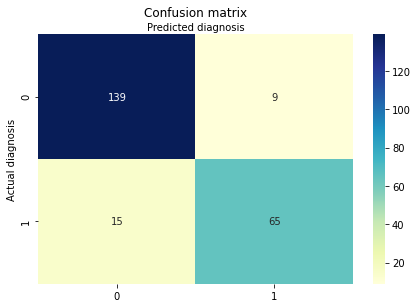

In [ ]:
# Create the Confusion Matrix
mltp_cnf_matrix = metrics.confusion_matrix(y_multiple_test, y_multiple_pred)

# Visualizing the Confusion Matrix
class_names = [0,1] # Our diagnosis categories

fig, ax = plt.subplots()
# Setting up and visualizing the plot (do not worry about the code below!)
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(mltp_cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') # Creating heatmap
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual diagnosis')
plt.xlabel('Predicted diagnosis')

# (Optional) Decision Trees Walkthrough

Finally, let's try a different classification model: decision trees! Recall that with decision trees, we choose features that create the best splits of our dataset (separates it into classes as best it can at that time).

In [ ]:
#Create the model { display-mode: "both" }
from sklearn import tree

# We'll first specify what model we want, in this case a decision tree
class_dt = tree.DecisionTreeClassifier(max_depth=2)

# We use our previous `x_train` and `y_train` sets to build the model
class_dt.fit(x_multiple, y_multiple)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(167.4, 181.2, 'X[1] <= 696.9\ngini = 0.475\nsamples = 341\nvalue = [209, 132]'),
 Text(83.7, 108.72, 'X[1] <= 529.8\ngini = 0.23\nsamples = 234\nvalue = [203, 31]'),
 Text(41.85, 36.23999999999998, 'gini = 0.062\nsamples = 157\nvalue = [152, 5]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.447\nsamples = 77\nvalue = [51, 26]'),
 Text(251.10000000000002, 108.72, 'X[3] <= 22.005\ngini = 0.106\nsamples = 107\nvalue = [6, 101]'),
 Text(209.25, 36.23999999999998, 'gini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(292.95, 36.23999999999998, 'gini = 0.038\nsamples = 102\nvalue = [2, 100]')]

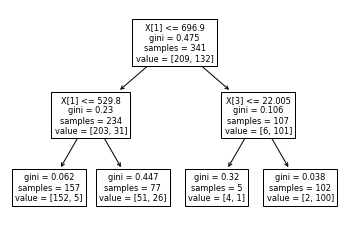

In [ ]:
# Visualize and interpret the tree
tree.plot_tree(class_dt) 


In [ ]:
y_pred = class_dt.predict(x_multiple_test)

In [ ]:
print(model_stats(y_multiple_test, y_multiple_pred))

(0.8947368421052632, 0.8783783783783784, 0.8125)


**Question: What features are included in this classifier? How might you interpret this tree? Did this do better than the logistic regression?**

# Challenge: Choosing a classifier
We've studied two common classifiers, but many more are available. You can read about some of them [here](https://stackabuse.com/overview-of-classification-methods-in-python-with-scikit-learn/).

Let's try to choose the overall best classifier for this dataset. Fill in the code below to:
*   Use a for loop to train and evaluate each classifer in the list on our dataset.
*   Calculate the precision, recall, and accuracy on the test set for each classifier, and store the results in a data frame so it's easy to analyze.
*   Create plots to show the relationships between precision, accuracy, and recall and help you choose the "best" classifier.

Then experiment with changing the hyperparameters of each classifier - can you get even better results?

In [ ]:
# Run this to import classifiers
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


In [ ]:
def model_stats(y_test, y_pred):
  accuracy = metrics.accuracy_score(y_test, y_pred)
  precision = metrics.precision_score(y_test, y_pred)
  recall = metrics.recall_score(y_test, y_pred)
  return accuracy, precision, recall

In [ ]:
#Once you've got your code working, try changing the hyperparameters of the classifiers
#to see if you can get even better results. 
#Can you find out what the hyperparameters mean?
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),  # this doesn't work with results.loc apparently
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),  # this too
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    linear_model.LogisticRegression(max_iter=1000)] 

results = pd.DataFrame(index = classifiers, columns = ['accuracy','precision','recall'])
print(results)

#Use a for loop to train and test each classifier, and store the test results in the appropriate place in results_frame. 
#You might find the code above useful, as well as https://towardsdatascience.com/a-python-beginners-look-at-loc-part-2-bddef7dfa7f2 .

### YOUR CODE HERE ###

for classifier in classifiers:
  classifier.fit(x_multiple, y_multiple)
  y_multiple_pred = classifier.predict(x_multiple_test)
  accuracy, precision, recall = model_stats(y_multiple_pred, y_multiple_test)
  print(classifier)
  print(accuracy, precision, recall)
  print('\n')
  # results.loc[classifier] = [accuracy, precision, recall] # for some reason this stops working for random forest or adaboost
  # print(results)
### END CODE ###

# pd.set_option('display.max_columns', None)
# print(results)

#TODO: Using pyplot, show the relationships between precision, recall, and/or accuracy.
#Tutorial here: https://matplotlib.org/tutorials/introductory/pyplot.html


                                                   accuracy precision recall
KNeighborsClassifier(algorithm='auto', leaf_siz...      NaN       NaN    NaN
SVC(C=0.025, break_ties=False, cache_size=200, ...      NaN       NaN    NaN
GaussianProcessClassifier(copy_X_train=True, ke...      NaN       NaN    NaN
DecisionTreeClassifier(ccp_alpha=0.0, class_wei...      NaN       NaN    NaN
RandomForestClassifier(bootstrap=True, ccp_alph...      NaN       NaN    NaN
MLPClassifier(activation='relu', alpha=1, batch...      NaN       NaN    NaN
AdaBoostClassifier(algorithm='SAMME.R', base_es...      NaN       NaN    NaN
GaussianNB(priors=None, var_smoothing=1e-09)            NaN       NaN    NaN
QuadraticDiscriminantAnalysis(priors=None, reg_...      NaN       NaN    NaN
LogisticRegression(C=1.0, class_weight=None, du...      NaN       NaN    NaN
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
      

**Think about:**
*   Which classifier would you choose?
*   What are the relationships among precision, recall, and accuracy? For this dataset, which is most important?
*   Can you find more successful hyperparameters for each classifer?

Your experiments will help you find a classifier that works very well on our test set. However, you're running a risk by doing so much manual fine-tuning: you might end up "overfitting" (on a more meta level) by choosing a classifier that works well on your test set, but might not work well on other data. 

That's why most machine learning projects actually use [*three* datasets](https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7): a training set that we use to train each candidate model; a validation set that we use to evaluate each candidate model and choose the best one; and finally, a test set which we use only once, to report the overall performance of our project. 




# Additional Notes



*   Same as additional notes from linear regression, make sure to note the workflow. As you can see, the workflow here is very similar to the workflow from linear regression.
*   Look more into the confusion matrix and what these various scores mean. These scores are highly meaningful and applicable in various fields.
*   Learn a bit about what all these different classifiers are. At least knowing a little would be good. And isn't it cool that we can test all of them just with a for loop? 
*   Training Data -> Validation Data -> Test Data
*   The data analysis step is very important. The first step in building an ai model is analyzing the data. Notice things about the data and know how to use libraries like pandas and matplot to help you with them. This goes back to the idea of the overall ml pipeline.
*   Isn't it amazing that we are able to make a pretty reliable breast cancer detection model this easilly without much knowledge in breast cancer? Of course in the real world the data collection and analysis part is very difficult, but it goes to show the power of artificial intelligence.
*   https://drive.google.com/file/d/18NPCLmlc8IxaVMhz4qLj9dXOvD0WJg4I/view?usp=sharing









In [ ]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),  # this doesn't work with results.loc apparently
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),  # this too
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    linear_model.LinearRegression(),
    linear_model.LogisticRegression(max_iter=1000)] 

for model in classifiers:
  print(model)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
SVC(C=0.025, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
GaussianProcessClassifier(copy_X_train=True, kernel=1**2 * RBF(length_scale=1),
                          max_iter_predict=100, multi_class='one_vs_rest',
                          n_jobs=None, n_restarts_optimizer=0,
                          optimizer='fmin_l_bfgs_b', random_state=None,
                          warm_start=False)
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None